In [470]:
%reset -f 

In [471]:
# libraries used
#  https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout
import itertools

In [472]:
emotions = pd.read_csv("drive/MyDrive/EEG/emotions.csv")
emotions.replace(['NEGATIVE', 'POSITIVE', 'NEUTRAL'], [2, 1, 0], inplace=True)
emotions['label'].unique()

array([2, 0, 1])

In [473]:
X = emotions.drop('label', axis=1).copy()
y = (emotions['label'].copy())

In [474]:
# Splitting data into training and testing as 80-20 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

x = X_train #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [475]:
#  resetting the data - https://www.tensorflow.org/api_docs/python/tf/keras/backend/clear_session
tf.keras.backend.clear_session()

In [476]:
model = Sequential()
model.add(Dense((2*X_train.shape[1]/3), input_dim=X_train.shape[1], activation='relu'))
model.add(Dense((2*X_train.shape[1]/3), activation='relu'))
model.add(Dense((1*X_train.shape[1]/3), activation='relu'))
model.add(Dense((1*X_train.shape[1]/3), activation='relu'))
model.add(Dense(3, activation='softmax'))
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())





Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1698)              4328202   
_________________________________________________________________
dense_1 (Dense)              (None, 1698)              2884902   
_________________________________________________________________
dense_2 (Dense)              (None, 849)               1442451   
_________________________________________________________________
dense_3 (Dense)              (None, 849)               721650    
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 2550      
Total params: 9,379,755
Trainable params: 9,379,755
Non-trainable params: 0
_________________________________________________________________
None


In [477]:
# for categorical entropy
# https://stackoverflow.com/questions/63211181/error-while-using-categorical-crossentropy
from tensorflow.keras.utils import to_categorical
Y_one_hot=to_categorical(y_train) # convert Y into an one-hot vector

In [478]:
# https://stackoverflow.com/questions/59737875/keras-change-learning-rate
#optimizer = tf.keras.optimizers.Adam(0.001)
#optimizer.learning_rate.assign(0.01)

opt = keras.optimizers.Adadelta(learning_rate=0.001)

model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# to be run for categorical cross entropy
# model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.001), metrics=['accuracy'])


In [479]:
# make sure that the input data is shuffled before hand so that the model doesn't notice patterns and generalizes well
# change y_train to y_hot_encoded when using categorical cross entorpy
import time
start_time = time.time()
history = model.fit(
    df,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=75)


# to be run for categorical cross entropy

#history = model.fit(
#    df,
#    Y_one_hot,
#    validation_split=0.2,
#    batch_size=32,
#    epochs=75)

Epoch 1/75
43/43 [==============================] - 5s 102ms/step - loss: 1.0986 - accuracy: 0.3759 - val_loss: 1.0477 - val_accuracy: 0.6100
Epoch 2/75
43/43 [==============================] - 4s 95ms/step - loss: 1.0336 - accuracy: 0.6484 - val_loss: 0.9996 - val_accuracy: 0.6540
Epoch 3/75
43/43 [==============================] - 4s 91ms/step - loss: 0.9899 - accuracy: 0.6695 - val_loss: 0.9647 - val_accuracy: 0.6540
Epoch 4/75
43/43 [==============================] - 4s 90ms/step - loss: 0.9514 - accuracy: 0.6786 - val_loss: 0.9341 - val_accuracy: 0.7595
Epoch 5/75
43/43 [==============================] - 4s 90ms/step - loss: 0.9317 - accuracy: 0.7366 - val_loss: 0.9078 - val_accuracy: 0.6628
Epoch 6/75
43/43 [==============================] - 4s 90ms/step - loss: 0.8896 - accuracy: 0.7097 - val_loss: 0.8832 - val_accuracy: 0.9032
Epoch 7/75
43/43 [==============================] - 4s 91ms/step - loss: 0.8749 - accuracy: 0.8381 - val_loss: 0.8581 - val_accuracy: 0.6716
Epoch 8/75
4

In [480]:
history.history

{'accuracy': [0.5124633312225342,
  0.6576246619224548,
  0.6810850501060486,
  0.6759530901908875,
  0.723607063293457,
  0.6957477927207947,
  0.7932551503181458,
  0.7001466155052185,
  0.7228739261627197,
  0.7683284282684326,
  0.757331371307373,
  0.740469217300415,
  0.7983871102333069,
  0.7624633312225342,
  0.7807917594909668,
  0.7976539731025696,
  0.8013196587562561,
  0.8057184815406799,
  0.8174486756324768,
  0.8431084752082825,
  0.849706768989563,
  0.8482404947280884,
  0.866568922996521,
  0.8548387289047241,
  0.8658357858657837,
  0.8746334314346313,
  0.8724340200424194,
  0.8768328428268433,
  0.8885630369186401,
  0.8900293111801147,
  0.8856304883956909,
  0.8936949968338013,
  0.8951612710952759,
  0.8870967626571655,
  0.8914955854415894,
  0.8958944082260132,
  0.8966275453567505,
  0.900293231010437,
  0.900293231010437,
  0.8980938196182251,
  0.9039589166641235,
  0.8973606824874878,
  0.8988269567489624,
  0.9017595052719116,
  0.900293231010437,
  0.90

In [481]:
print("--- %s seconds ---" % (time.time() - start_time))


--- 300.80503368377686 seconds ---


In [482]:
x_test = X_test #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled_test = min_max_scaler.fit_transform(x_test)
df_test = pd.DataFrame(x_scaled_test)

In [483]:
predictions = model.predict(x=df_test, batch_size=32)

In [484]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [485]:
cm = confusion_matrix(y_true=y_test, y_pred=rounded_predictions)

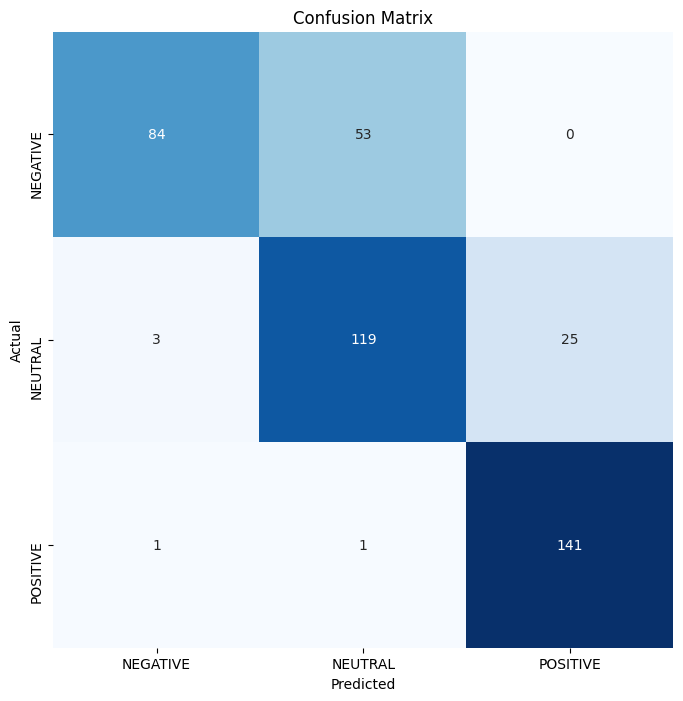

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.95      0.61      0.75       137
     NEUTRAL       0.69      0.81      0.74       147
    POSITIVE       0.85      0.99      0.91       143

    accuracy                           0.81       427
   macro avg       0.83      0.80      0.80       427
weighted avg       0.83      0.81      0.80       427



In [486]:
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}
# for diff dataset
# label_mapping = {'NEGATIVE': 0, 'POSITIVE': 1}
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
clr = classification_report(y_test, rounded_predictions, target_names=label_mapping.keys())
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)



In [487]:
# https://stackoverflow.com/questions/26413185/how-to-recover-matplotlib-defaults-after-setting-stylesheet
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [488]:
training_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']
training_loss  = history.history['loss']
validation_loss = history.history['val_loss']

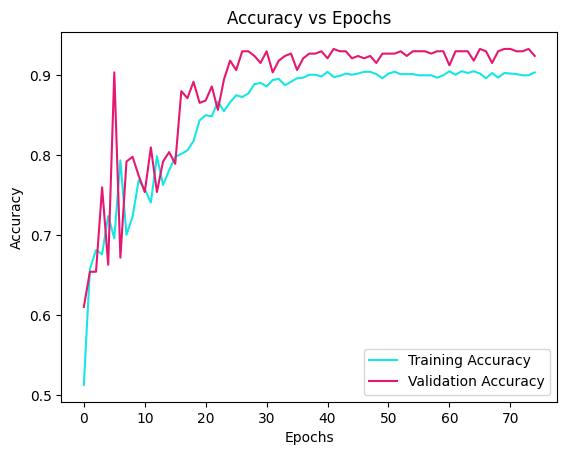

In [489]:
epochs = history.epoch
plt.plot(epochs, training_acc, color = '#17e6e6', label='Training Accuracy')
plt.plot(epochs, validation_acc,color = '#e61771', label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('AccuracyVsEpochs.png')
plt.show()